# Выявление закономерностей определяющих успешность игры

Рассмотрим данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Выявим определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Рассмотрим данные до 2016 года, но будем иметь в виду, что данные за 2016 год не полные.

 

## Изучение данных из файла

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

data= pd.read_csv('/datasets/games.csv')
display(data.head())
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [2]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [3]:
data = data.rename(columns=
                   {
                       'Name': 'name',
                       'Platform': 'platform',
                       'Year_of_Release': 'year_of_release',
                       'Genre': 'genre',
                       'NA_sales': 'na_sales',
                       'EU_sales': 'eu_sales',
                       'JP_sales': 'jp_sales',
                       'Other_sales': 'other_sales',
                       'Critic_Score': 'critic_score',
                       'User_Score': 'user_score',
                       'Rating': 'rating',
                   }
                  )

In [4]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
#с учетом регистра уменьшаем кол-во уникальных значений
data['name']=data['name'].str.lower()
print('Уникальные значения в столбце name')
print(data['name'].value_counts())

Уникальные значения в столбце name
need for speed: most wanted    12
madden nfl 07                   9
ratatouille                     9
lego marvel super heroes        9
fifa 14                         9
                               ..
g1 jockey wii                   1
need for speed: v-rally         1
realsports volleyball           1
super momotarou dentetsu dx     1
uk truck simulator              1
Name: name, Length: 11559, dtype: int64


In [6]:
#с учетом регистра уменьшаем кол-во уникальных значений
data['platform']=data['platform'].str.lower()
print('Уникальные значения в столбце platform')
print(data['platform'].value_counts())

Уникальные значения в столбце platform
ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
psp     1209
ps      1197
pc       974
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
n64      319
xone     247
snes     239
sat      173
wiiu     147
2600     133
nes       98
gb        98
dc        52
gen       29
ng        12
scd        6
ws         6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64


In [7]:
#с учетом регистра уменьшаем кол-во уникальных значений
data['genre']=data['genre'].str.lower()
print('Уникальные значения в столбце genre')
print(data['genre'].value_counts())

Уникальные значения в столбце genre
action          3369
sports          2348
misc            1750
role-playing    1498
shooter         1323
adventure       1303
racing          1249
platform         888
simulation       873
fighting         849
strategy         683
puzzle           580
Name: genre, dtype: int64


In [8]:
print('Уникальные значения в столбце User_Score')
print(data['user_score'].value_counts())

Уникальные значения в столбце User_Score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.5       2
1.1       2
1.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64



<div class="alert alert-info">
<b> </b>

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.
    
 
</div>

In [9]:
print('Уникальные значения в столбце rating')
print(data['rating'].value_counts())

Уникальные значения в столбце rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64


<div class="alert alert-info">
<b> </b>

Е — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше

Т — «Подросткам»: Игра подходит для лиц от 13 лет и старше. 

М - «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет
    
E10+ — «Для всех от 10 лет и старше»
 
</div>

In [10]:
print('Уникальные значения в столбце Critic_Score')
print(data['critic_score'].value_counts())

Уникальные значения в столбце Critic_Score
70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64


In [11]:
print('Уникальные значения в столбце year_of_release')
print(data['year_of_release'].value_counts())

Уникальные значения в столбце year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64



<div class="alert alert-info">
<b> </b>

1. 11559 игр - уник.значений
2. 31 платформа - уник.значений
3. 12 жанров  - уник.значений
4. оценок пользователей - 96 уник.значений, из них 2424 - "tbd"
5. Рейтинг - 8 уник.значений
6. оценки критиков - 81 уник.значений
7. колонки с продажами заполнены полностью
    
 
</div>

<div class="alert alert-info">
<b> </b>

В данных по названию игры и году выпуска были пропуски, удалили строки с этими пропусками, т.к. для анализа эти данные имеют значения и заменить пропуски нельзя. Строки с пропусками оценки критиков, пользователей и рейтинг оставили, заполнять пропущенные значения не стали, т.к. оценки зависят от игры, платформы. Уникальных значений игр более 11 000 и 31 платформа, комбинаций игра-платформа огромное кол-во, поэтому замена средним, медианой не подойдет.

Отсутствующие значения в оценках критиков и пользователей, 'tbd' заменим на "0". В анализе отсутствующие значения брать в расчет не будем.
 
</div>

## Предобработка данных

In [12]:
data.dropna(subset = ['name', 'year_of_release'], inplace = True)
data = data.drop_duplicates() # удалим дубликаты в таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [13]:
data['user_score'] = data['user_score'].fillna(0) #заменяем отсутствующие значения на 0
data['user_score'] = data['user_score'].replace('tbd', 0)
data = data.astype({'user_score':'float64'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         16444 non-null float64
rating             9768 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [14]:
data['critic_score'] = data['critic_score'].fillna(0) #заменяем отсутствующие значения на 0
data['rating'] = data['rating'].fillna(0)

In [15]:
data = data.astype(
    {
        'year_of_release':'int',
        'critic_score':'int',
        }
)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null int64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [16]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,33.494405,3.234237
std,5.875525,0.818378,0.506716,0.311100,0.188005,35.821558,3.689043
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.000000,0.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [17]:
#data['sum_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,0,0.0,0,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,0,0.0,0,31.38


In [18]:
data.query('sum_sales==0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16676,g1 jockey 4 2008,ps3,2008,sports,0.0,0.0,0.0,0.0,0,0.0,0,0.0
16709,score international baja 1000: the official game,ps2,2008,racing,0.0,0.0,0.0,0.0,0,0.0,0,0.0


In [19]:
data=data.query('sum_sales>0')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
name               16442 non-null object
platform           16442 non-null object
year_of_release    16442 non-null int64
genre              16442 non-null object
na_sales           16442 non-null float64
eu_sales           16442 non-null float64
jp_sales           16442 non-null float64
other_sales        16442 non-null float64
critic_score       16442 non-null int64
user_score         16442 non-null float64
rating             16442 non-null object
sum_sales          16442 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


In [20]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,16442.000000,16442.000000,16442.000000,16442.000000,16442.000000,16442.000000,16442.000000,16442.000000
mean,2006.486072,0.264045,0.145948,0.078497,0.047599,33.498480,3.234631,0.536089
std,5.875859,0.818422,0.506745,0.311118,0.188016,35.821831,3.689095,1.558869
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.000000,0.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


## Анализ данных

### Кол-во игр выпущенных в год

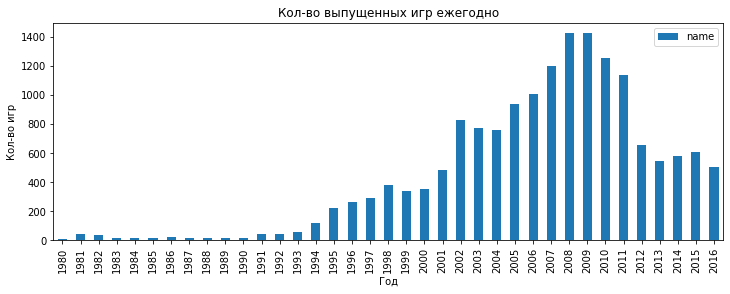

In [21]:
data.pivot_table(index='year_of_release', values='name', aggfunc = 'count').plot(kind='bar', figsize=(12,4)).set_title('Кол-во выпущенных игр ежегодно')
plt.xlabel("Год") 
plt.ylabel("Кол-во игр"); 

<div class="alert alert-info">
<b></b>

Максимальный подъем по кол-ву выпущенных игр ежегодно был 2008-2009 годы, далее пошел спад, а с 2012 года ситуация выровнялась, поэтому был проанализирован период с 2012 года включительно.  Необходимо было выявить какие платформы несмотря на общий спад набирали обороты по выручкам и по кол-ву выпущенных игр в эти годы. Именно это и поможет выбрать прибыльную рекламную стратегию.
 
</div>



<div class="alert alert-info">
<b> С 2002 года кол-во выпускаемых игр стало значительно расти, а с 2012 резко сократилось</b>

Посмотрим на динамику платформ с 2012 года.
 
</div>

<div class="alert alert-info">
<b> Построила несколько графиков, по 5 лет каждый для наглядности</b>

Платформы "живут" недолго, несколько лет. Платформа pc продержалась с 1995 года, 
остальные появлялись и исчезали.

С 2010 года увеличивают обороты по кол-ву игр следующие платформы:
xone, psv, ps4.
pc и 3ds - на одном уровне держутся.
 
</div>

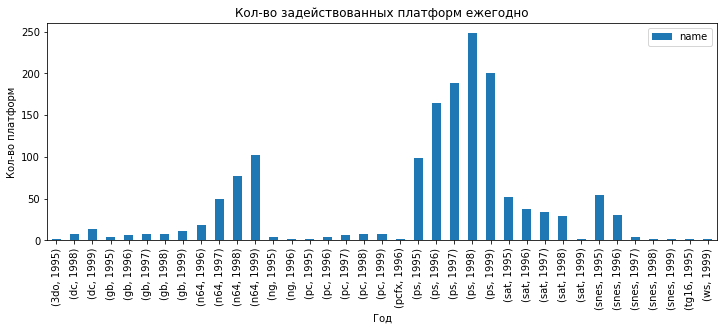

In [22]:
data.query('1995 <= year_of_release <2000').pivot_table(index=['platform', 'year_of_release'], values='name', aggfunc = 'count').plot(kind='bar', figsize=(12,4)).set_title('Кол-во задействованных платформ ежегодно')
plt.xlabel("Год") 
plt.ylabel("Кол-во платформ"); 

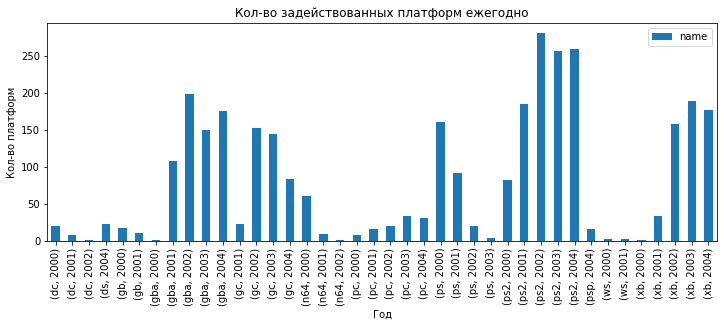

In [23]:
data.query('2000 <= year_of_release <2005').pivot_table(index=['platform', 'year_of_release'], values='name', aggfunc = 'count').plot(kind='bar', figsize=(12,4)).set_title('Кол-во задействованных платформ ежегодно')
plt.xlabel("Год") 
plt.ylabel("Кол-во платформ"); 

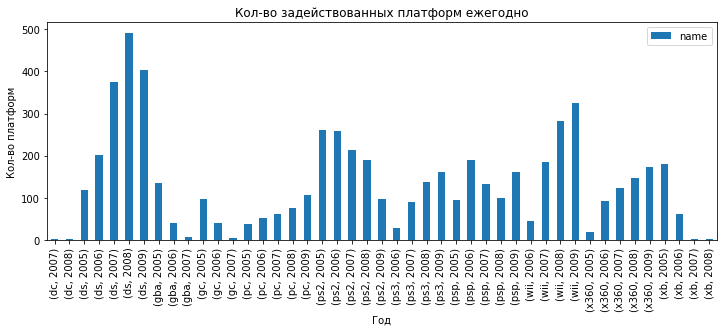

In [24]:
data.query('2005 <= year_of_release <2010').pivot_table(index=['platform', 'year_of_release'], values='name', aggfunc = 'count').plot(kind='bar', figsize=(12,4)).set_title('Кол-во задействованных платформ ежегодно')
plt.xlabel("Год") 
plt.ylabel("Кол-во платформ"); 

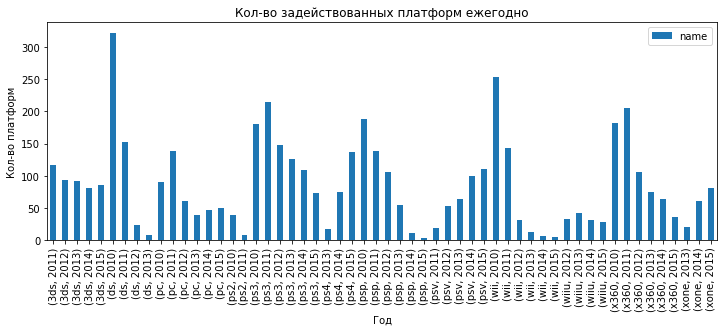

In [25]:
data.query('2010 <= year_of_release <2016').pivot_table(index=['platform', 'year_of_release'], values='name', aggfunc = 'count').plot(kind='bar', figsize=(12,4)).set_title('Кол-во задействованных платформ ежегодно')
plt.xlabel("Год") 
plt.ylabel("Кол-во платформ"); 

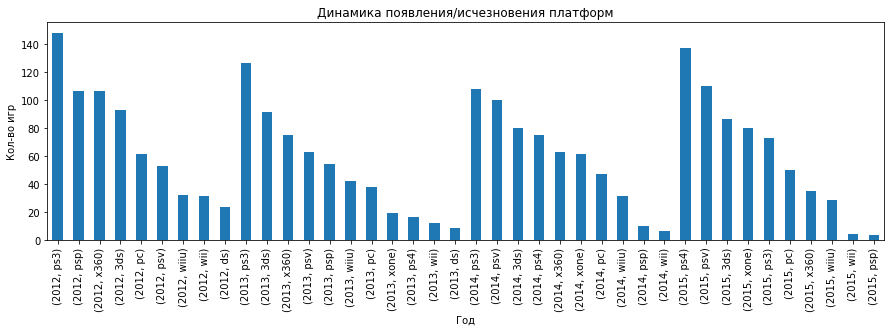

In [26]:
data.query('2012 <= year_of_release < 2016').groupby('year_of_release')['platform'].value_counts().plot(kind='bar', figsize=(15,4)).set_title('Динамика появления/исчезновения платформ') 
plt.xlabel('Год') 
plt.ylabel('Кол-во игр'); 
plt.show()

<div class="alert alert-info">
<b> К 2016 году больше игр появляется на платформах: </b>

1. ps4
    
2. psv
    
3. xone
    
4. pc
    
5. 3ds - ровно
    
**Посмотрим как менялись продажи по платформам с 2012 года**
 
</div>

### Выручка по каждой платформе с 2012 года

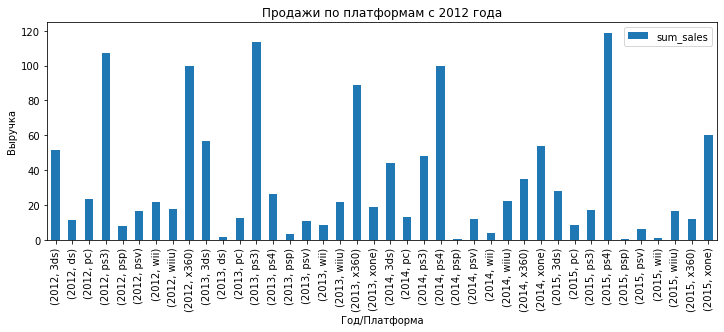

In [27]:
#т.к. данные за 2016 м.б. не полные, не включаем 2016 год
data.query('2012<=year_of_release<2016').pivot_table(
    index=['year_of_release', 'platform'], values='sum_sales', aggfunc = 'sum'
).plot(kind='bar', figsize=(12,4)).set_title(
    'Продажи по платформам с 2012 года')
plt.xlabel("Год/Платформа") 
plt.ylabel("Выручка"); 

<div class="alert alert-info">
<b> К 2016 году продажи увеличиваются на платформах: </b>

1. ps4
    
2. xone
    

**Посмотрим продажи по платформам за период с 2012 года** 
</div>

<div class="alert alert-info">
<b> </b>
   
**Лидеры с 2012 до 2016 включительно и одновременно положительная динамика роста - ps4, xone**
    
    
</div>

<div class="alert alert-info">
<b>3DS востребована, по кол-ву 
игр на ней с 2010 года держится в одном состоянии. Эта платформа востребована у JP. EU и NA ей
гораздо меньше пользуются</b>

    
</div>

<div class="alert alert-info">
<b> Последующий анализ данных будем проводить с 2012 года включительно </b>
 
 
</div>

In [28]:
data=data.query('year_of_release>=2012')

### Лидеры платформ с 2012 года

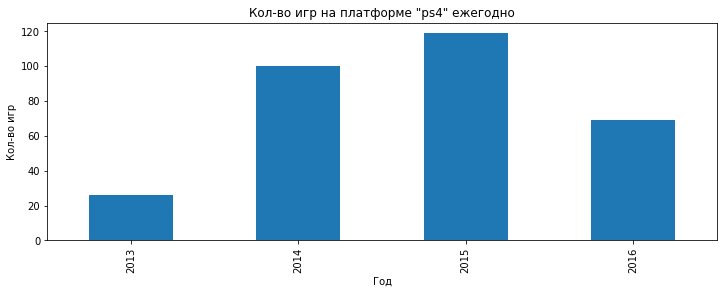

In [29]:
data.query('platform == "ps4"').groupby('year_of_release')['sum_sales'].sum().plot(kind='bar', figsize=(12,4)).set_title('Кол-во игр на платформе "ps4" ежегодно')
plt.xlabel('Год') 
plt.ylabel('Кол-во игр'); 
plt.show()

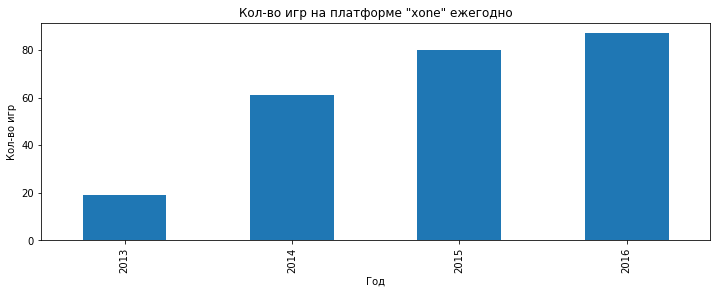

In [30]:
data.query('platform == "xone"').groupby('year_of_release')['platform'].count().plot(kind='bar', figsize=(12,4)).set_title('Кол-во игр на платформе "xone" ежегодно') 
plt.xlabel('Год') 
plt.ylabel('Кол-во игр'); 
plt.show()

In [31]:
data.query('platform == "ps4"')['sum_sales'].sum()/data.query('platform == "xone"')['sum_sales'].sum()

1.9717549585739393

<div class="alert alert-info">
<b> Платформа ps4 принесла в 2 раза больше выручки, чем xone за 2012-2016 годы </b>
 
 
</div>

### Ящик с усами по платформам ps4, xone

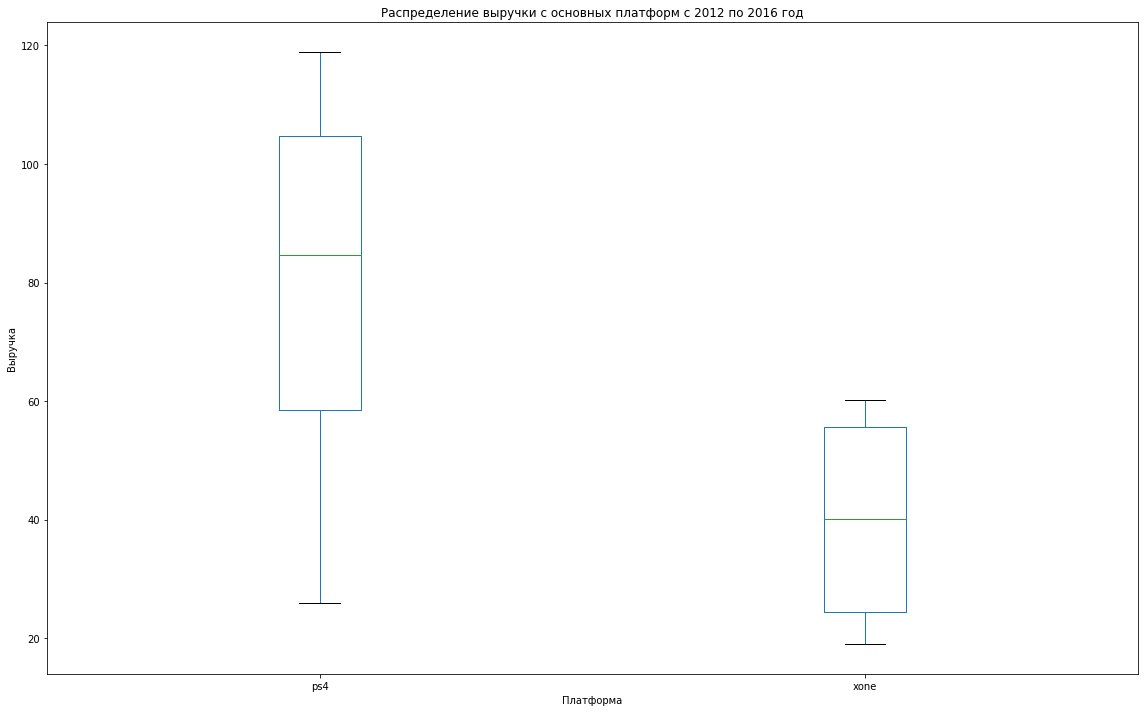

In [32]:
data.query('(platform=="xone") or (platform=="ps4")').pivot_table(
    columns ='platform', index='year_of_release', values='sum_sales', aggfunc='sum', fill_value=0
).plot.box(figsize=(16,10)).set_title('Распределение выручки с основных платформ с 2012 по 2016 год')
plt.xlabel("Платформа") 
plt.ylabel("Выручка"); 
plt.tight_layout()
plt.show()

<div class="alert alert-info">
<b> График подтверждает вышеуказанный вывод о разности выручки платформ ps4 и xone за 2012-2016 годы в пользу первой </b>
 
 
</div>

### Влияние отзывов на продажи

In [33]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,0,0.0,0,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


#### Платформа - ps4

0.406567902061781


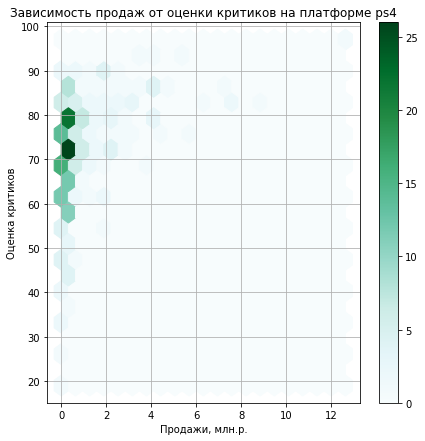

In [34]:
data_ps4=data.query('(platform=="ps4") & (critic_score>0)')
data_ps4.plot(x='sum_sales', y = 'critic_score', title='Зависимость продаж от оценки критиков на платформе ps4', 
              kind='hexbin', gridsize=20, figsize=(7,7), sharex=False, grid=True)
plt.xlabel("Продажи, млн.р.") # подпись к оси X
plt.ylabel("Оценка критиков"); # подпись к оси Y
print(data_ps4['sum_sales'].corr(data_ps4['critic_score']))

<div class="alert alert-info">
<b> Больше продаж при оценке 70-80, но зависимость не сильная </b>
 
 
</div>

-0.031957110204556376


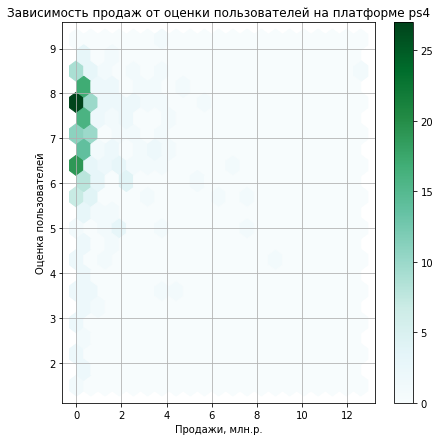

In [35]:
data_ps4_user=data.query('(platform=="ps4") & (user_score>0)')
data_ps4_user.plot(x='sum_sales', y = 'user_score', title='Зависимость продаж от оценки пользователей на платформе ps4', 
              kind='hexbin', gridsize=20, figsize=(7,7), sharex=False, grid=True)
plt.xlabel("Продажи, млн.р.") # подпись к оси X
plt.ylabel("Оценка пользователей"); # подпись к оси Y
print(data_ps4_user['sum_sales'].corr(data_ps4_user['user_score']))

<div class="alert alert-info">
<b> Зависимость продаж от оценки пользователей отсутствует </b>
 
 
</div>

#### Платформа - xone

0.41699832800840175


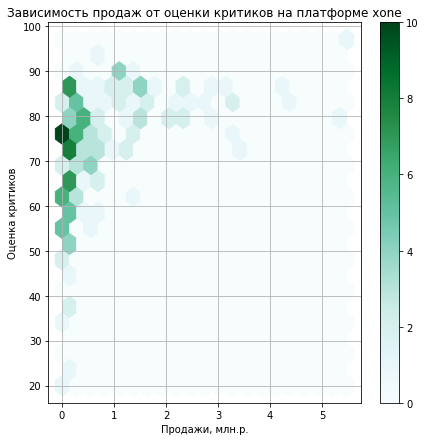

In [36]:
data_xone=data.query('(platform=="xone") & (critic_score>0)')
data_xone.plot(x='sum_sales', y = 'critic_score', title='Зависимость продаж от оценки критиков на платформе xone', 
              kind='hexbin', gridsize=20, figsize=(7,7), sharex=False, grid=True)
plt.xlabel("Продажи, млн.р.") # подпись к оси X
plt.ylabel("Оценка критиков"); # подпись к оси Y
print(data_xone['sum_sales'].corr(data_xone['critic_score']))

<div class="alert alert-info">
<b> Больше продаж при оценке 60-80, особенно - 75, но зависимость не сильная </b>
 
 
</div>

-0.06892505328279412


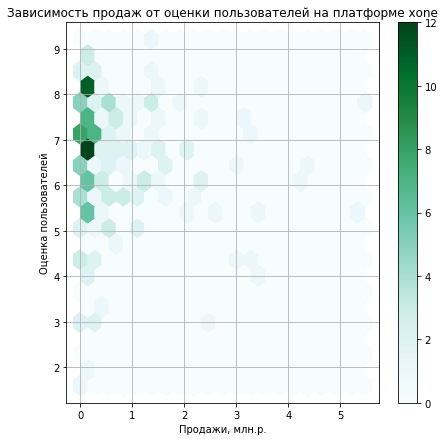

In [37]:
data_xone_user=data.query('(platform=="xone") & (user_score>0)')
data_xone_user.plot(x='sum_sales', y = 'user_score', title='Зависимость продаж от оценки пользователей на платформе xone', 
              kind='hexbin', gridsize=20, figsize=(7,7), sharex=False, grid=True)
plt.xlabel("Продажи, млн.р.") # подпись к оси X
plt.ylabel("Оценка пользователей"); # подпись к оси Y
print(data_xone_user['sum_sales'].corr(data_xone_user['user_score']))

<div class="alert alert-info">
<b> Зависимость продаж от оценки пользователей отсутствует </b>
 
 
</div>

#### Все платформы

0.2704968907388867


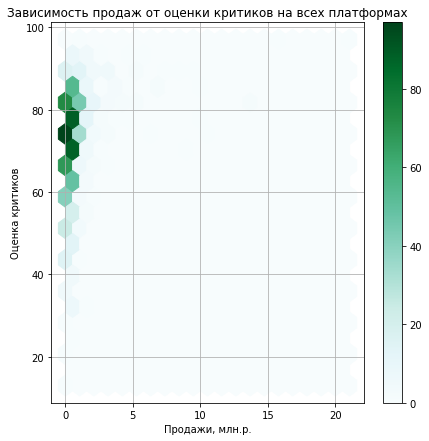

In [38]:
data_all=data.query('(critic_score>0) & (platform != "xone") & (platform != "ps4")')
data_all.plot(x='sum_sales', y = 'critic_score', title='Зависимость продаж от оценки критиков на всех платформах', 
              kind='hexbin', gridsize=20, figsize=(7,7), sharex=False, grid=True)
plt.xlabel("Продажи, млн.р.") # подпись к оси X
plt.ylabel("Оценка критиков"); # подпись к оси Y
print(data_all['sum_sales'].corr(data_all['critic_score']))

In [39]:

data_all.platform.value_counts()

ps3     214
pc      198
x360    171
psv     107
3ds     104
wiiu     90
wii       5
psp       1
ds        1
Name: platform, dtype: int64

<div class="alert alert-info">
<b> Зависимость продаж от оценки критиков меньше, чем на предыдущих двух платформах </b>
 
 
</div>

### Влияние жанра на продажи

In [40]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'sum_sales'],
      dtype='object')

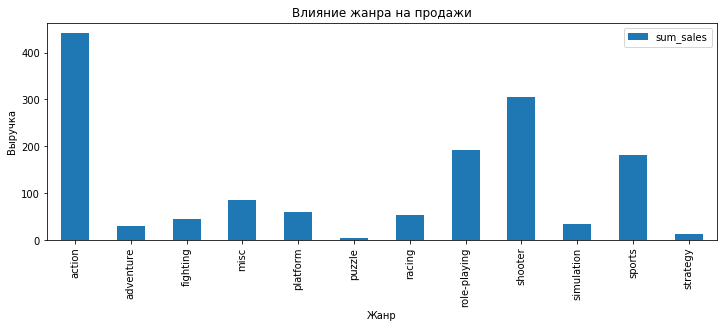

In [41]:
data.pivot_table(
    index=['genre'], values='sum_sales', aggfunc = 'sum'
).plot(kind='bar', figsize=(12,4)).set_title(
    'Влияние жанра на продажи')
plt.xlabel("Жанр") 
plt.ylabel("Выручка"); 

<div class="alert alert-info">
<b> Лидеры продаж - action, shooter, role-playing, sports </b>
 
 
</div>

<div class="alert alert-info">
<b> Ниже сделала график с медиан.продажами</b>

Лидирует shooter. 
 
</div>

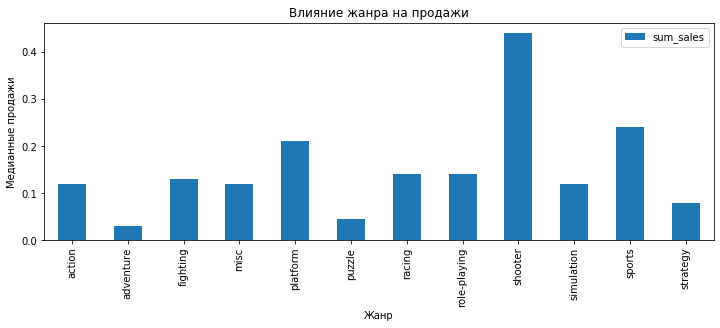

In [42]:
data.pivot_table(
    index=['genre'], values='sum_sales', aggfunc = 'median'
).plot(kind='bar', figsize=(12,4)).set_title(
    'Влияние жанра на продажи')
plt.xlabel("Жанр") 
plt.ylabel("Медианные продажи"); 

## Портрет пользователя каждого региона

<div class="alert alert-info">
<b> Заменила отсутствующий рейтинг на "0" </b>

Для пользователей JP после замены отсутствующих значений, картина сильно изменилась.

Игры без рейтинга продаются на сумму в разы больше, чем игры с любым другим рейтингом.
 
</div>

In [43]:
display(data.head())
data.shape

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,0,0.0,0,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


(2886, 12)

### Портрет пользователя NA

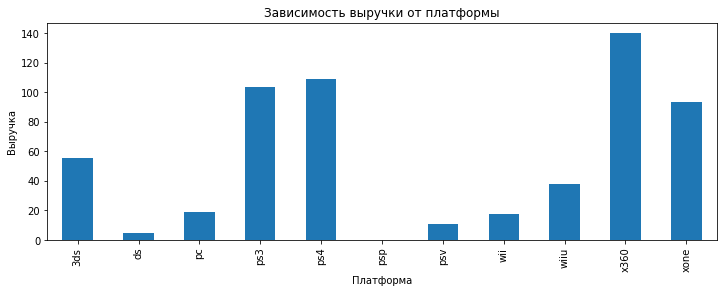

In [44]:
data.groupby('platform')['na_sales'].sum().plot(kind='bar', figsize=(12,4)).set_title('Зависимость выручки от платформы')
plt.xlabel("Платформа") 
plt.ylabel("Выручка"); 

<div class="alert alert-info">
<b> Лидируют платформы - x360, xone, ps4, ps3, 3ds </b>
 
 
</div>

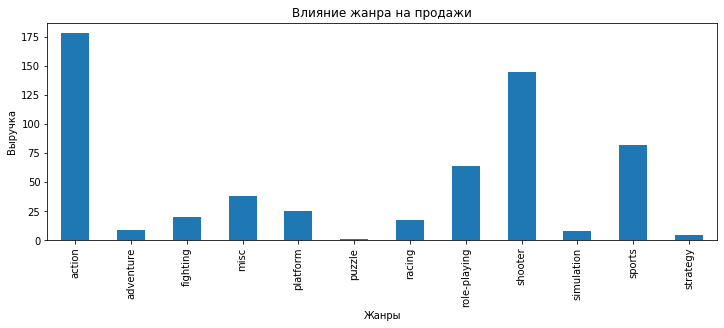

In [45]:
data.query('na_sales>0').groupby('genre')['na_sales'].sum().plot(kind='bar', figsize=(12,4)).set_title('Влияние жанра на продажи')
plt.xlabel("Жанры") 
plt.ylabel("Выручка"); 

<div class="alert alert-info">
<b> Лидеры продаж - action, shooter, role-playing, sports </b>
 
 
</div>

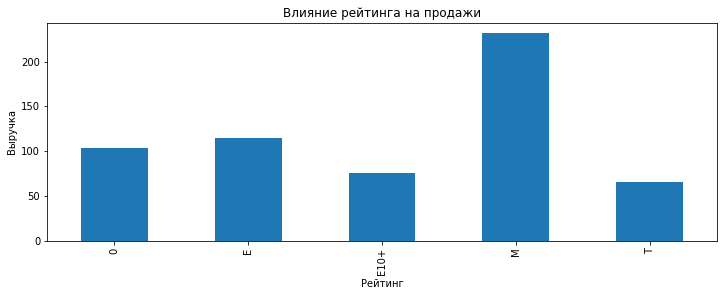

In [46]:
data.groupby('rating')['na_sales'].sum().plot(kind='bar', figsize=(12,4)).set_title('Влияние рейтинга на продажи')
plt.xlabel("Рейтинг") 
plt.ylabel("Выручка"); 

<div class="alert alert-info">
<b> Есть существенное влияние рейтинга "M" на продажи </b>
 
 
</div>

### Портрет пользователя EU

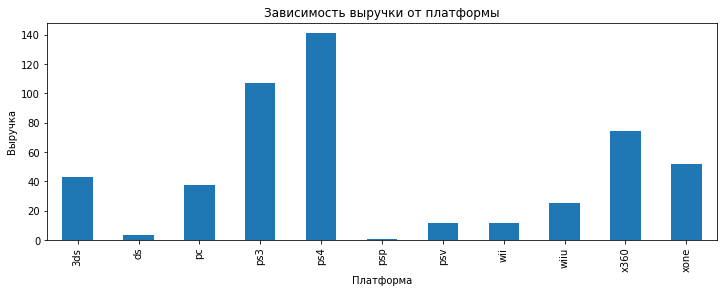

In [47]:
data.groupby('platform')['eu_sales'].sum().plot(kind='bar', figsize=(12,4)).set_title('Зависимость выручки от платформы')
plt.xlabel("Платформа") 
plt.ylabel("Выручка"); 

<div class="alert alert-info">
<b> Лидируют платформы - x360, xone, ps4, ps3, 3ds </b>
 
 
</div>

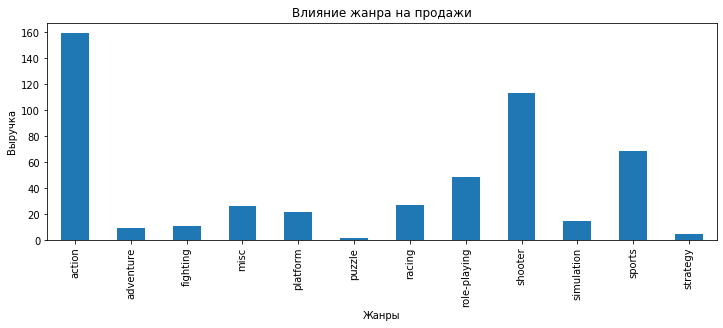

In [48]:
data.query('eu_sales>0').groupby('genre')['eu_sales'].sum().plot(kind='bar', figsize=(12,4)).set_title('Влияние жанра на продажи')
plt.xlabel("Жанры") 
plt.ylabel("Выручка"); 

<div class="alert alert-info">
<b> Лидеры продаж - action, shooter, role-playing, sports </b>
 
 
</div>

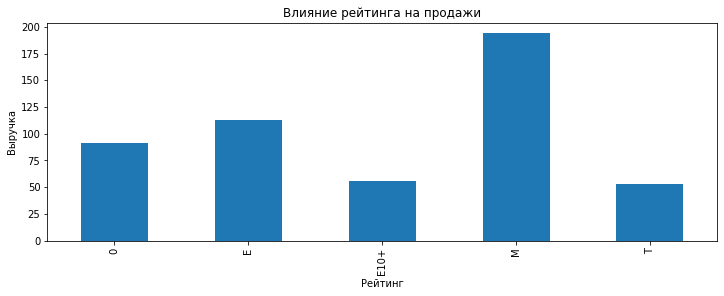

In [49]:
data.groupby('rating')['eu_sales'].sum().plot(kind='bar', figsize=(12,4)).set_title('Влияние рейтинга на продажи')
plt.xlabel("Рейтинг") 
plt.ylabel("Выручка"); 

<div class="alert alert-info">
<b> Есть существенное влияние рейтинга "M" на продажи </b>
 
 
</div>

### Портрет пользователя JP

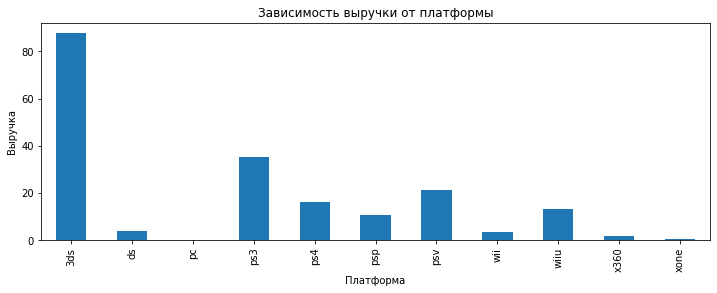

In [50]:
data.groupby('platform')['jp_sales'].sum().plot(kind='bar', figsize=(12,4)).set_title('Зависимость выручки от платформы')
plt.xlabel("Платформа") 
plt.ylabel("Выручка"); 

<div class="alert alert-info">
<b> Лидирует платформа с большим отрывом - 3ds </b>
 
 
</div>

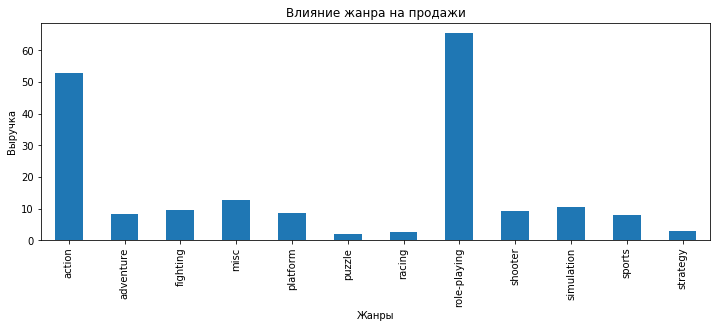

In [51]:
data.query('jp_sales>0').groupby('genre')['jp_sales'].sum().plot(kind='bar', figsize=(12,4)).set_title('Влияние жанра на продажи')
plt.xlabel("Жанры") 
plt.ylabel("Выручка"); 

<div class="alert alert-info">
<b> Лидеры продаж - action, role-playing </b>
 
 
</div>

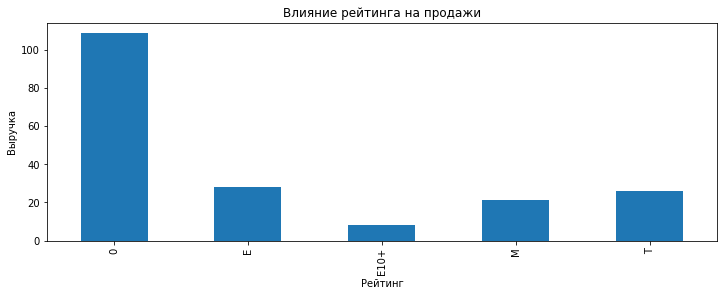

In [52]:
data.groupby('rating')['jp_sales'].sum().plot(kind='bar', figsize=(12,4)).set_title('Влияние рейтинга на продажи')
plt.xlabel("Рейтинг") 
plt.ylabel("Выручка"); 

<div class="alert alert-info">
<b> Игры без рейтинга продаются на сумму в разы больше, чем другие. </b>
 
 
</div>

<div class="alert alert-info">


ESRB работает только на территории СА, в Японии есть аналогичная организация: CERO. Я думаю, что, с одной стороны, иностранным играм они не присваивают рейтинги, поскольку на них уже есть маркировка. Чтобы не было конфликта, так сказать. Так что вполне возможно, что часть игр это продукция Японии или же это корейские игры (там тоже своя организация). С другой стороны, раз они продают игры на своем рынке, то присвоение рейтинга может быть обязательным. Значит, дело еще может быть в том, что наша таблица это склейка двух таблиц: продажи на западе и на востоке. Так или иначе, это очень показательный пример. 
</div>

In [53]:
data['na_sales'].sum()/data['jp_sales'].sum()

3.068698722608786

In [54]:
data['na_sales'].sum()/data['eu_sales'].sum()

1.1660352787972061

In [55]:
data['eu_sales'].sum()/data['jp_sales'].sum()

2.6317374597569843

<div class="alert alert-info">
<b> Вкладывать деньги в рекламу надо в следующих пропорциях:
NA : EU :  JP = 3 : 3 : 1 </b>
  
</div>

## ГИПОТЕЗЫ

### Xone and PC

In [56]:
data_xone=data.query('(platform == "xone") & (user_score>0)')
print(data_xone['user_score'].mean())
data_pc=data.query('(platform == "pc") & (user_score>0)')
print(data_pc['user_score'].mean())

6.521428571428572
6.4286407766990274


<div class="alert alert-info">
<b>Средние пользовательские рейтинги Xone и PC равны 6,5 и 6,4 соответственно  </b>

- Предположим что это могло произойти случайно.
    
- Пусть нулевая гипотеза звучит так - средние пользовательские рейтинги платформ равны
    
- Альтернативная  - не равны
   
</div>

In [57]:
variance = np.var(data_xone['user_score'], ddof=1)
print('Дисперсия - xone', variance)
variance = np.var(data_pc['user_score'], ddof=1)
print('Дисперсия - pc', variance)

Дисперсия - xone 1.9069968429360695
Дисперсия - pc 2.770443997158418


In [58]:

alpha = 0.05

results_1 = sps.levene(data_xone['user_score'], data_pc['user_score'])

print('p-значение:', results_1.pvalue)

if results_1.pvalue < alpha:
    print('Дисперсии не равны')
else:
    print('Дисперсии равны') 

p-значение: 0.01251484281850554
Дисперсии не равны


In [59]:
alpha = 0.05

results = st.ttest_ind(data_xone['user_score'], data_pc['user_score'], equal_var = False) 
#т.к. дисперсии равны equal_var = True по умолчанию

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">
<b>Оставляем нулевую гипотезу о том, что средние пользовательские рейтинги платформ равны </b>

   
</div>

### Action and Sports

In [60]:
data_action=data.query('(genre == "action") & (user_score>0)')
print(data_action['user_score'].mean())
data_sports=data.query('(genre == "sports") & (user_score>0)')
print(data_sports['user_score'].mean())

6.825047801147227
5.455897435897437


<div class="alert alert-info">
<b>Средние пользовательские рейтинги жанров action и sports равны 6,8 и 5,4 соответственно  </b>

- Они различаются и нам надо рассмотреть альтернативную гипотезу - о том, что они разные.
    
- Пусть нулевая гипотеза звучит так - средние пользовательские рейтинги жанров равны
    
- Альтернативная  - не равны
   
</div>

In [61]:
variance = np.var(data_action['user_score'], ddof=1)
print('Дисперсия - action', variance)
variance = np.var(data_sports['user_score'], ddof=1)
print('Дисперсия - sports', variance)

Дисперсия - action 1.8890840494348111
Дисперсия - sports 3.022890298704732


In [62]:
alpha = 0.05

results_2 = sps.levene(data_action['user_score'], data_sports['user_score'])

print('p-значение:', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Дисперсии не равны')
else:
    print('Дисперсии равны') 

p-значение: 1.3125789036876737e-05
Дисперсии не равны


In [63]:
alpha = 0.05

results_3 = st.ttest_ind(data_action['user_score'], data_sports['user_score'], equal_var = False)
#дисперсии не равны, поэтому  equal_var = False

print('p-значение:', results_3.pvalue)

if results_3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


<div class="alert alert-info">
<b>Принимаем альтернативную гипотезу -  средние пользовательские рейтинги жанров не равны</b>

   
</div>

## ВЫВОД

<div class="alert alert-info">
<b>  </b>

**Краткий обзор проведённой работы**
1.	В данных по названию игры и году выпуска были пропуски, удалили строки с этими пропусками, т.к. для анализа эти данные имеют значения и заменить пропуски нельзя. Строки с пропусками оценки критиков, пользователей и рейтинг оставили, заполнять пропущенные значения не стали, т.к. оценки зависят от игры, платформы. Уникальных значений игр более 11 000 и 31 платформа, комбинаций игра-платформа огромное кол-во, поэтому замена средним, медианой не подойдет.
2.	Максимальны й подъем по кол-ву выпущенных игр ежегодно был 2008-2009 годы, далее пошел спад, а с 2012 года ситуация выровнялась, поэтому был проанализирован период с 2012 года включительно.  Необходимо было выявить какие платформы несмотря на общий спад набирали обороты по выручкам и по кол-ву выпущенных игр в эти годы. Именно это и поможет выбрать прибыльную рекламную стратегию.
    
**Анализ рынка игр** 
1.	К 2016 году больше игр появляется на платформах:  ps4, psv,  xone, pc.
2.	За период 2012-2016 год продажи увеличиваются на платформах: ps4,  xone. Для JP актуальна платформа 3ds.
3.	Таким образом, выявилось два лидера по росту кол-ва игр и продажам - ps4,  xone и 3ds для JP.
4.	Стоит учитывать, что ps4 более прибыльная, чем xone, поэтому рекламный бюджет стоит делить как 2 к 1 соответственно.
5.	Оценка критиков влияет на продажи, а оценки пользователей – нет.
6.	Самые прибыльные жанры оказались - action, shooter, role-playing, sports, причем action лидирует с большим отрывом.

**Портрет пользователя каждого региона**
1.	Портреты пользователей NA и EU совпадают. Лидируют платформы по продажам - x360, xone, ps4, ps3, 3ds. Лидеры продаж - action, shooter, role-playing, sports. Больше выручки приносят игры с рейтингом М («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет).
2.	А вот портрет пользователя JP отличается. Лидирует платформа с большим отрывом - 3ds.  Лидеры продаж - action, role-playing. Игры без рейтинга приносят больше выручки в разы в отличии от любого другого рейтинга.
   
**Проверка гипотез**
    
1.	Средние значения пользовательских рейтингах  по данной выборке почти равны (средние пользовательские рейтинги Xone и PC равны 6,5 и 6,4 соответственно), проверка гипотез показала, что мы не можем отвергнуть нулевую гипотезу о равенстве средних.
2.	Средние значения пользовательских рейтингах по данной выборке различаются (Средние пользовательские рейтинги жанров action и sports равны 6,8 и 5,4 соответственно), проверка гипотез показала, что можем отвергнуть нулевую гипотезу и принять альтернативную гипотезу -  средние пользовательские рейтинги жанров не равны.

 
**Рекомендации** 
1.	Желательно иметь две рекламные стратегии.
2.	Первая касается пользователей NA и EU. Есть смысл продавать игры через платформы ps4 и xone, учитывая что ps4 более прибыльная. Вкладывать деньги лучше в жанры action, shooter с рейтингом «М»
3.	Вторая стратегия для пользователей JP. Есть смысл продавать игры через платформу 3ds. Вкладывать деньги лучше в жанры action, role-playing, причем role-playing – более выгодные. Наиболее востребованы игры с рейтингом «Е» («Для всех»), «Т» («Подросткам»: Игра подходит для лиц от 13 лет и старше), «М» («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет).
4.	Вкладывать деньги в рекламу надо в следующих пропорциях:
NA : EU :  JP = 3 : 3 : 1





    
</div>